In [2]:
import numpy as np
import scipy as sp
from scipy.fft import fft2,ifft2,fftfreq,fftshift
import imageio

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from matplotlib.animation import PillowWriter
import pint

u = pint.UnitRegistry()

In [3]:
x = np.linspace(-5,5,2000)*u.mm
xv,yv = np.meshgrid(x,x)
lam = 660*u.nm

In [4]:
U0 = (np.sqrt(xv**2 + yv**2)<3*u.mm) * (np.sqrt(xv**2 + yv**2)>2.85*u.mm)
U0.astype(float)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

/home/kanan/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:682: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


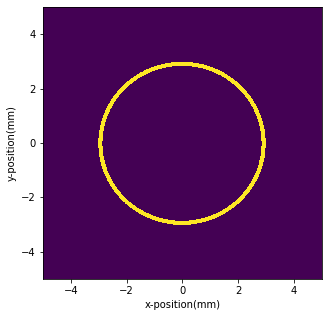

In [5]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,U0,cmap='viridis')
plt.xlabel('x-position(mm)')
plt.ylabel('y-position(mm)')
plt.show()

In [6]:
# doing fft in two dimensions
A = fft2(U0)
kx = fftfreq(len(x),np.diff(x)[0])*2*np.pi
kxv,kyv = np.meshgrid(kx,kx)


/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


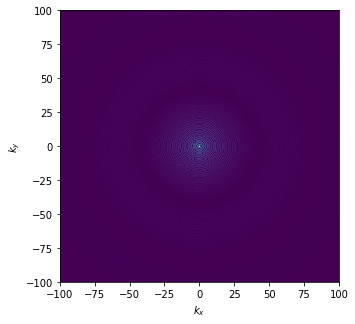

In [7]:
#plotting the fourier transform
plt.figure(figsize=(5,5))
plt.pcolormesh(fftshift(kxv.magnitude),fftshift(kyv.magnitude),np.abs(fftshift(A)))
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [8]:
def get_U(z,k):
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


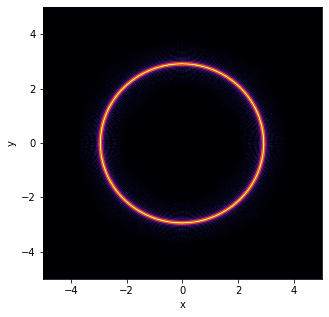

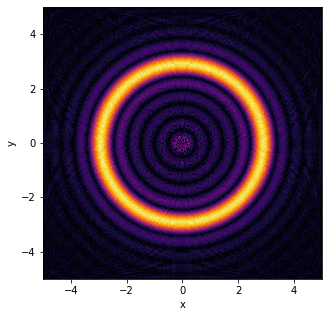

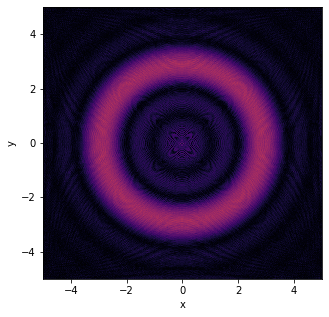

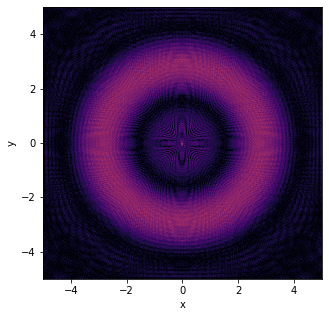

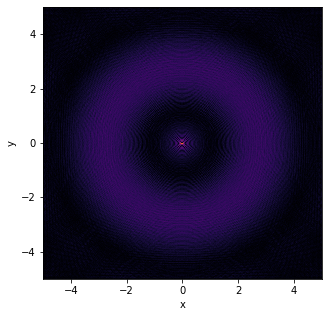

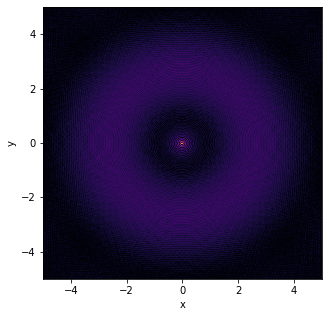

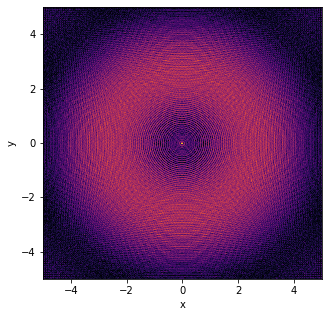

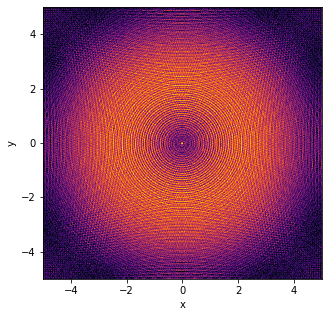

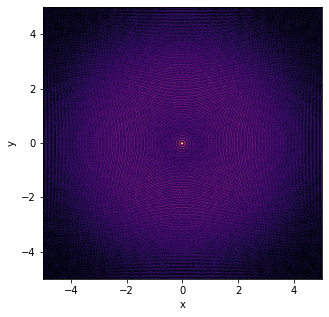

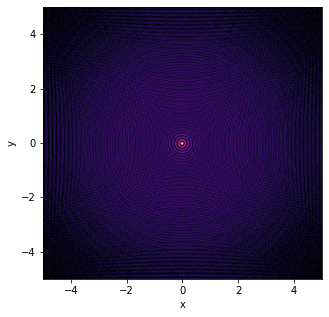

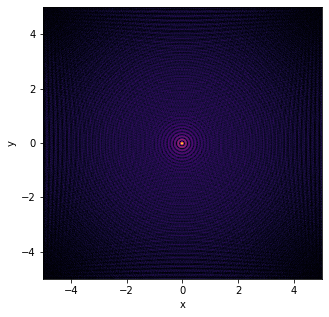

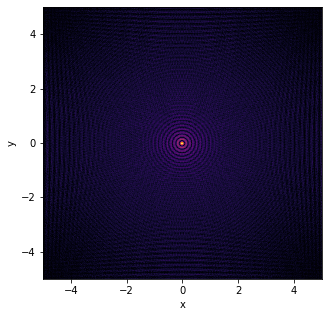

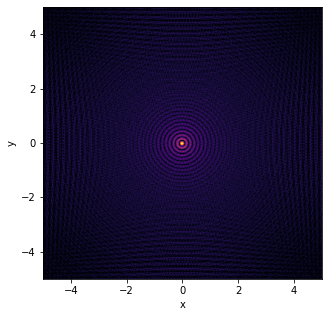

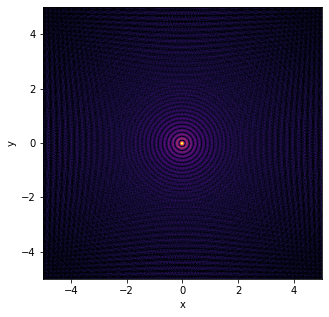

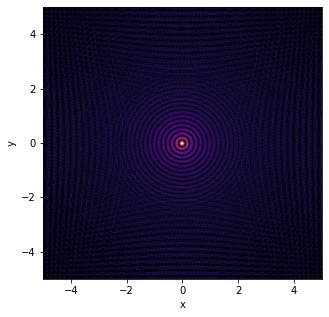

In [9]:
k = 2*np.pi/lam
#z1 = 3*u.cm
z = np.arange(1,150,10)
for i in z:
    z1 = i*u.cm
    U = get_U(z1,k)     #get value of U
    plt.figure(figsize=(5,5))
    plt.pcolormesh(xv,yv,np.abs(U),cmap='inferno')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.show()

In [10]:
print(lam)

660 nanometer


/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


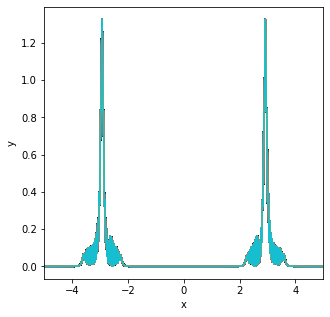

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


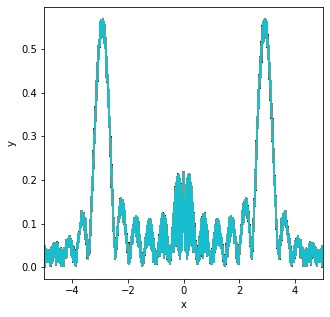

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


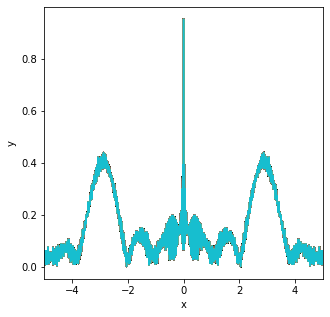

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


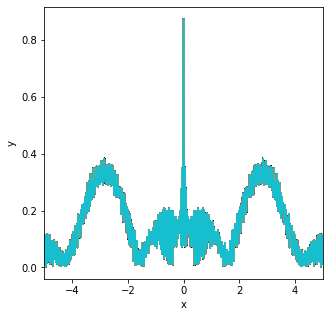

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


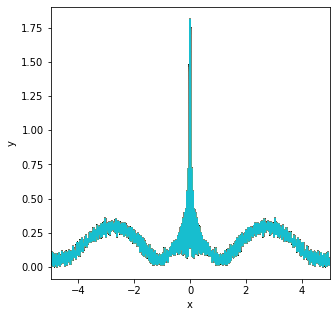

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


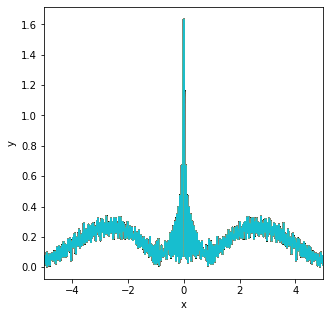

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


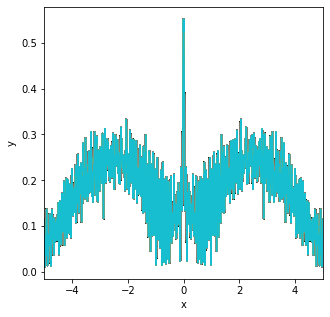

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


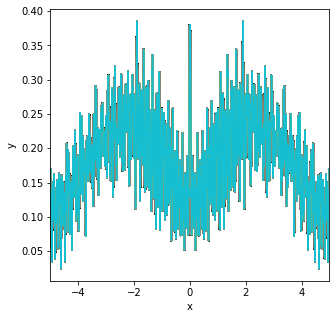

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


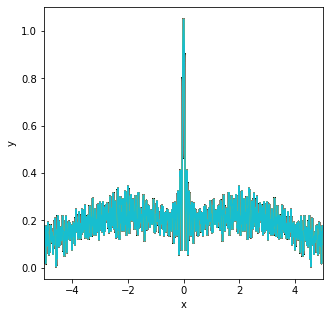

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


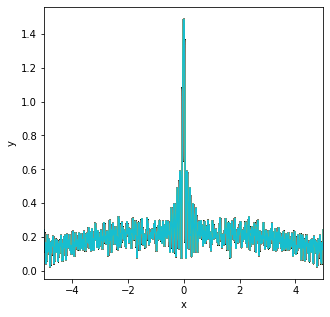

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


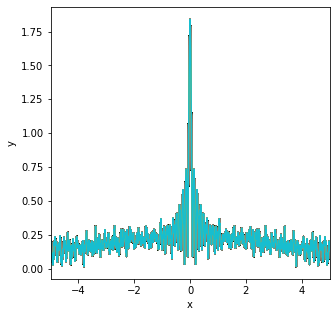

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


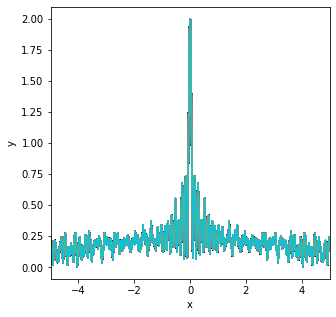

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


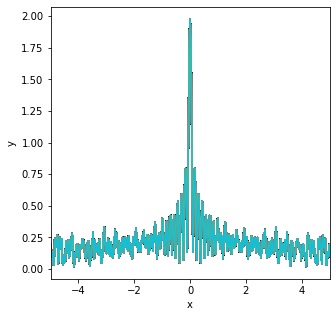

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


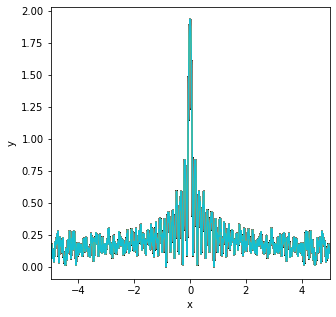

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


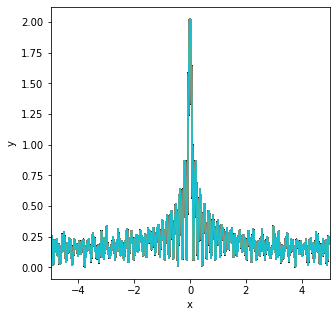

In [11]:
import scipy.special as sp
k = 2*np.pi/lam
#z1 = 3*u.cm
z = np.arange(1,150,10)
b = np.linspace(-5,5,2000)
xv1,yv1 = np.meshgrid(b,b)
R = np.sqrt(xv1**2 + yv1**2)

for i in z:
    z1 = i*u.cm
    U = get_U(z1,k)     #get value of U
    plt.figure(figsize=(5,5))
    plt.plot(yv,np.abs(U)[1000][:])
    p = np.abs(sp.jv(0,(12.0241*R)))
    #plt.plot(yv,p[1000][:],color='y',linestyle = ':')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-5,5)
    #plt.ylim(0,2)
    plt.show()